In [1]:
%load_ext autoreload
%autoreload 2
from common import *

In [2]:
RESULT_JSON = "/Users/law/repos/viper/results/update/update_bm.json"

In [5]:
from collections import defaultdict
runs = defaultdict(list)

BMS = get_all_runs(RESULT_JSON)
IN_PLACE = 'in_place'
COPY_WRITE = 'get_update'

for bm in BMS:
    if 'aggregate_name' not in bm or bm['aggregate_name'] != 'median':
        continue
    if IN_PLACE in bm['name']:
        runs[IN_PLACE].append(bm)
    elif COPY_WRITE in bm['name']:
        runs[COPY_WRITE].append(bm)
    else:
        raise RuntimeError(f"Unknown benchmark type {bm['name']}")

runs[IN_PLACE].sort(key=lambda x: x['threads'])
runs[COPY_WRITE].sort(key=lambda x: x['threads'])

pprint(runs)

defaultdict(<class 'list'>,
            {'get_update': [{'aggregate_name': 'median',
                             'cpu_time': 117995480.381,
                             'items_per_second': 422683.01427236357,
                             'iterations': 3,
                             'name': 'ViperFixture<KeyType16,ValueType200>/get_update/100000000/50000000/iterations:1/repeats:3/real_time/threads:1_median',
                             'real_time': 118291954.75496817,
                             'repetitions': 3,
                             'run_name': 'ViperFixture<KeyType16,ValueType200>/get_update/100000000/50000000/iterations:1/repeats:3/real_time/threads:1',
                             'run_type': 'aggregate',
                             'threads': 1,
                             'time_unit': 'us'},
                            {'aggregate_name': 'median',
                             'cpu_time': 62165750.16800004,
                             'items_per_second': 802347.06939

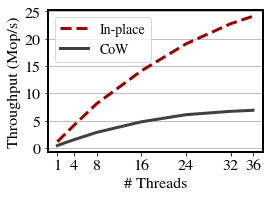

In [57]:
in_place_w_threads = [(run['threads'], run['items_per_second'] / MILLION) for run in runs[IN_PLACE]]
copy_write = [run['items_per_second'] / MILLION for run in runs[COPY_WRITE]]

threads, in_place = zip(*in_place_w_threads)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(threads, in_place, label="In-place", ls='--', color=COLORS[0])
ax.plot(threads, copy_write, label="CoW", ls='-', color= COLORS[3])
ax.set_yticks(range(0, 26, 5))
ax.set_xticks([1, 4, 8 ,16 ,24, 32, 36])
# ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel("Throughput (Mop/s)", fontsize=16)
ax.set_xlabel("# Threads", fontsize=16)
ax.legend(frameon=True)

ax.set_axisbelow(True)
ax.grid(axis='y', which='major')
fig.savefig('charts/update.pdf', bbox_inches='tight')
fig.savefig('charts/update.svg', bbox_inches='tight')